 Internet Traffic Data Linear Regression Assignment 3 

 By Amizuku Francis 

In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [6]:
filename = './Data/internet_traffic_hist.csv'
df_hist = pd.read_csv("internet_traffic_hist.csv")
df_hist.head(11)

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009
5,308.791823,2010
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014


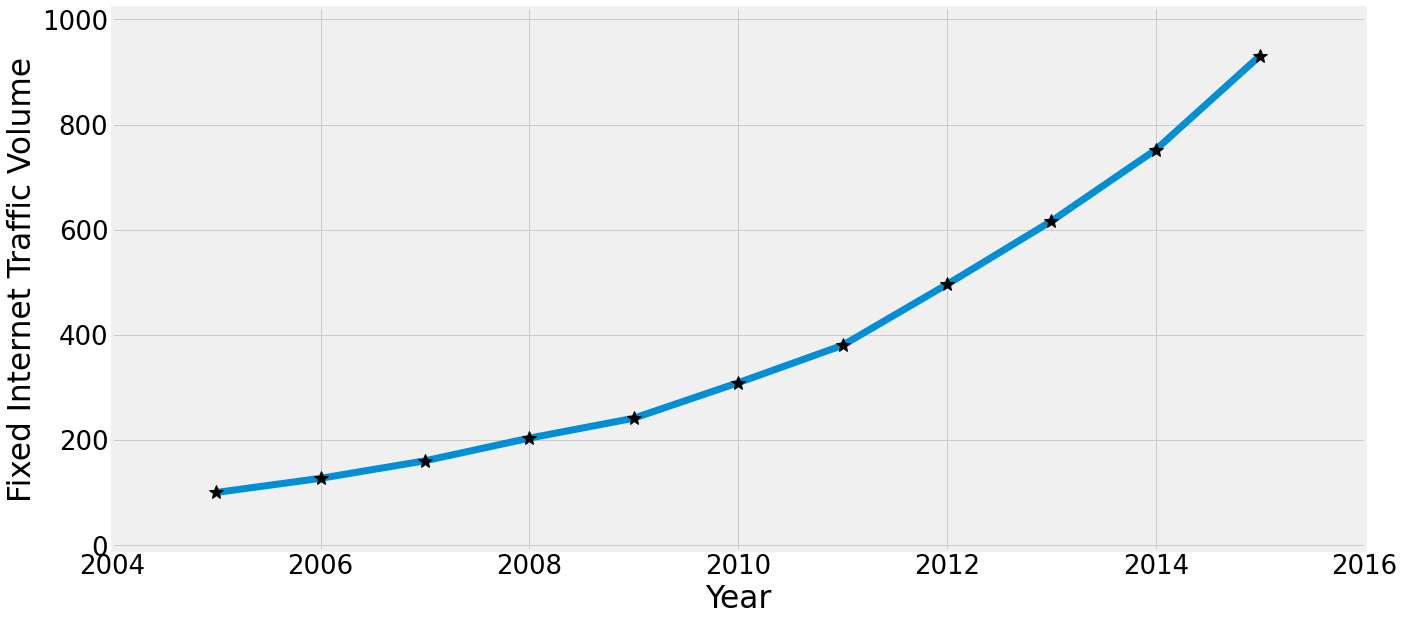

In [8]:
plt.figure(figsize = (20,10))

x = df_hist.year
y = df_hist.traffic

plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'*k', markersize = 14, label = '')

plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1,  y.iloc[-1]*1.1])

plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

plt.rcParams.update({'font.size': 30})
plt.show()

 Simple Linear Regression: First Order Polynomial 

The slope of line is 79.5271096624497.
The y intercept is -159457.1226583487.
The best fit simple linear regression line is 79.5271096624497x + -159457.1226583487.


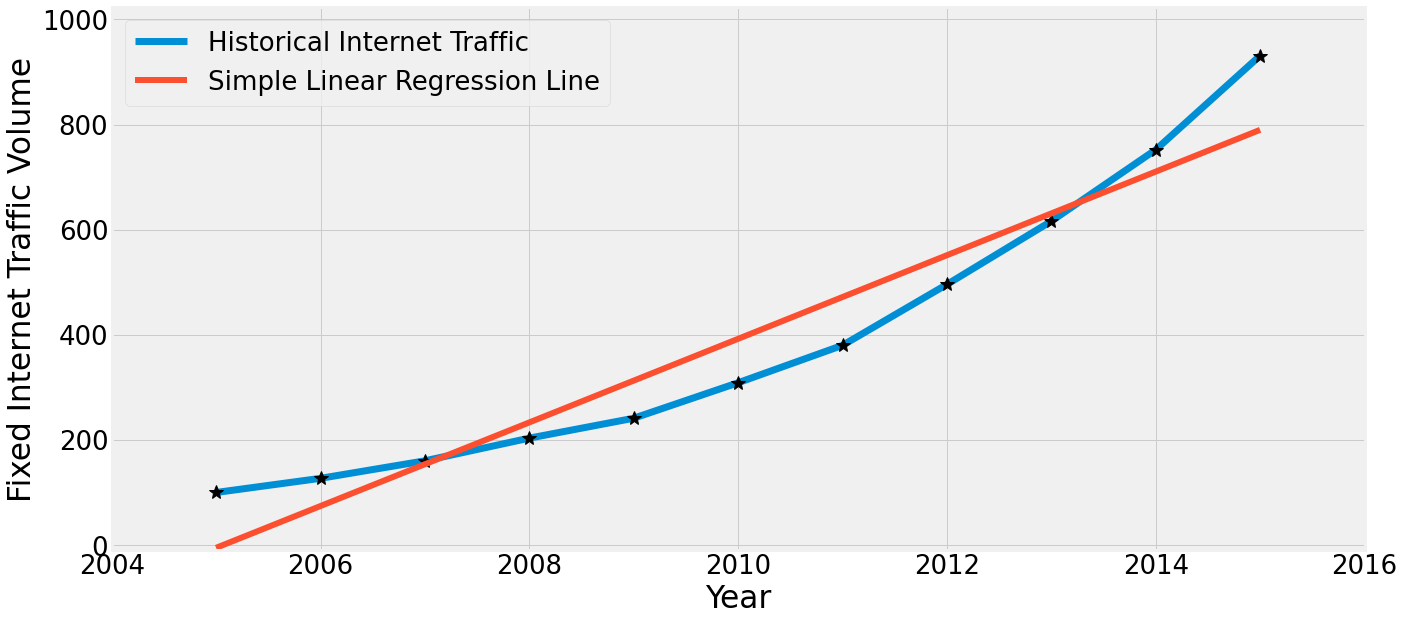

In [20]:
plt.figure(figsize = (20,10))

order = 1
x = df_hist.year
y = df_hist.traffic

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))


plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper left')


plt.rcParams.update({'font.size': 26})
plt.show()

</h2> Linear Regression: Higher Order Polynomials </h2>

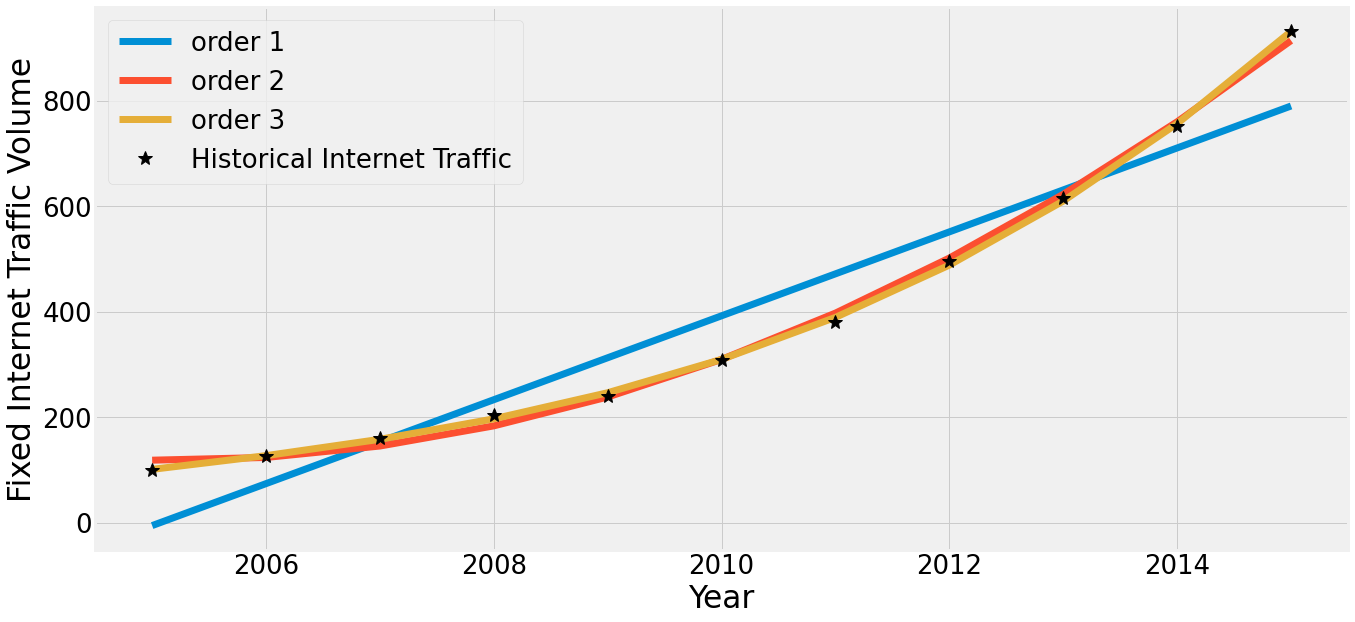

In [21]:
models = []       
errors_hist = []  
mse_hist = []     

for order in range(1,4):
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (20,10))

for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Internet Traffic', linewidth = 7)
plt.legend(loc = 'upper left')

plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

plt.show()

 Calculating the Errors 

In [22]:
models = []       
errors_hist = []  
mse_hist = []     

for order in range(1,4):
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
    e = np.abs(y-p(x))        
    mse = np.sum(e**2)/len(df_hist) 
    
    errors_hist.append(e)   
    mse_hist.append(mse) 

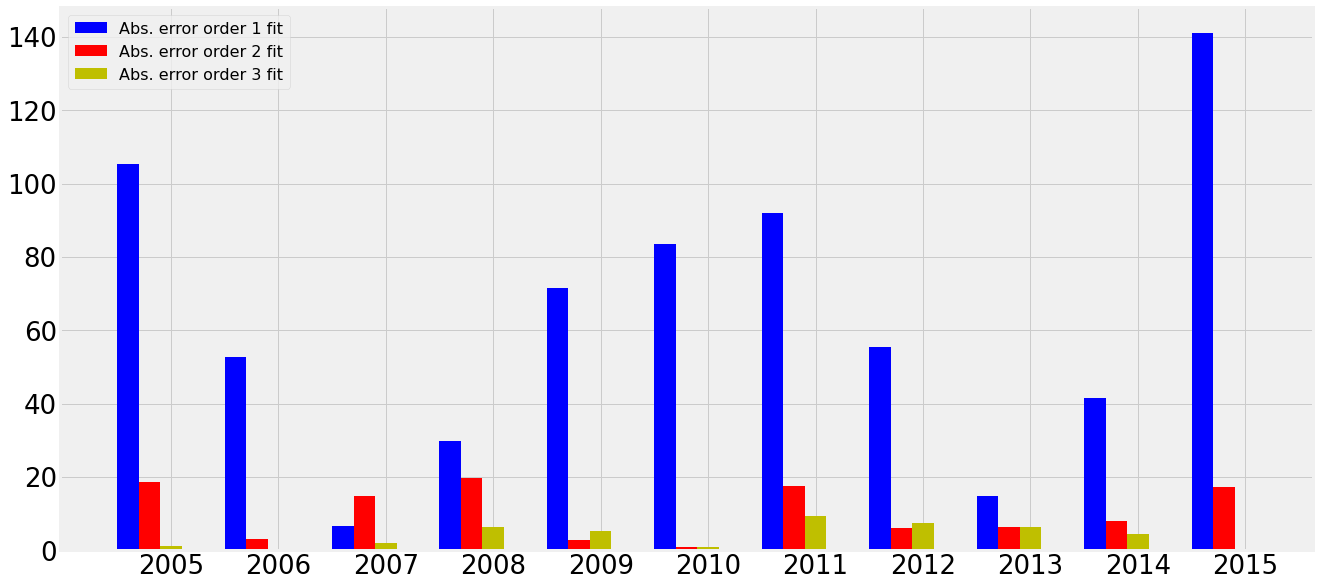

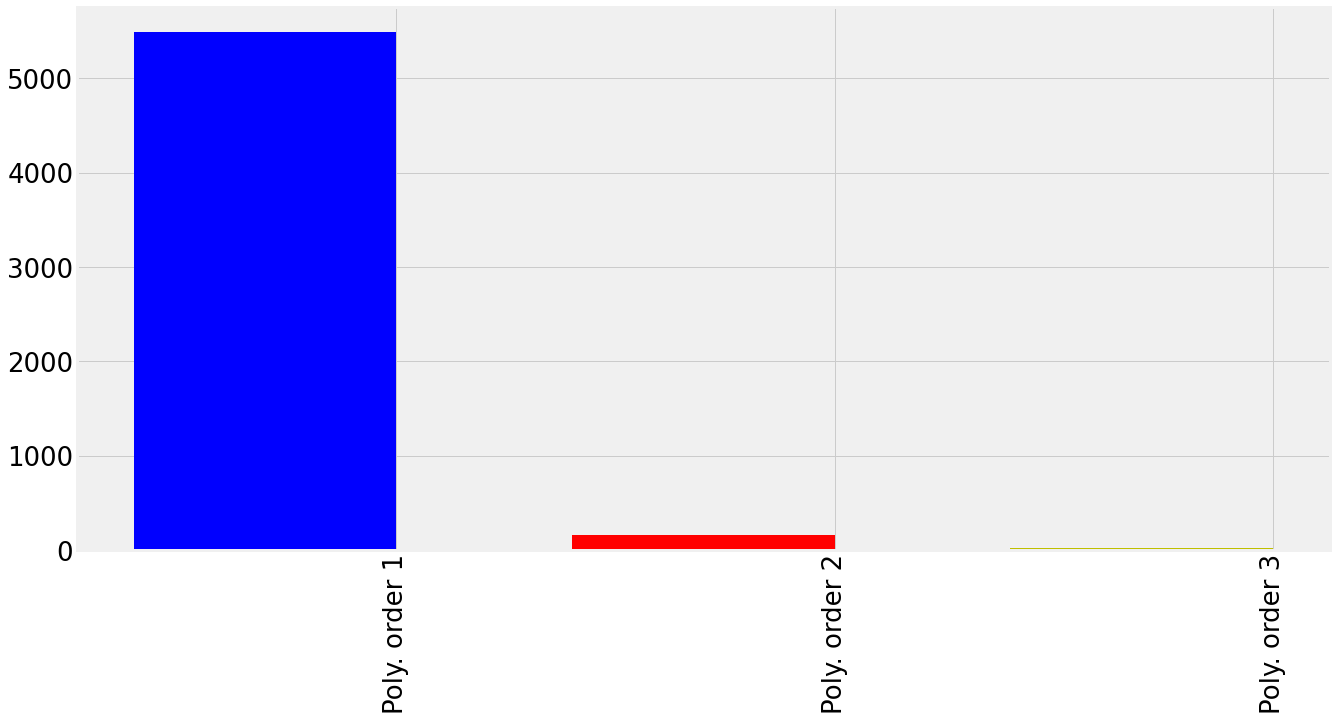

In [24]:
x = df_hist.year
width = 0.2   

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')

ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2])
width = .6   

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3'], rotation=90)
plt.show()

 Non-Linear Regression Model: Exponential Growth. 

In [25]:
order = 3

x = df_hist.year.values      
y = df_hist.traffic.values   

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

p = np.poly1d(p_array)

print(type(p), p)

print('The value of the polynomial for x = 2020 is : {} '.format(p(2020)))

e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('The estimated polynomial parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated polynomial parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

<class 'numpy.ndarray'> [ 4.83129470e-01 -2.90500618e+03  5.82252165e+06 -3.89005440e+09]
<class 'numpy.poly1d'>         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The value of the polynomial for x = 2020 is : 2328.5784826278687 
The estimated polynomial parameters are:         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The errors for each value of x, given the estimated polynomial parameters are: 
 [1.30741358 0.39124311 2.0272336  6.32983541 5.28394021 0.93069325
 9.41691687 7.34010701 6.27730415 4.48133218 0.16291044]
The MSE is :25.172184330631865


In [26]:
def my_exp_func(x, a, b):
    return a * (b ** x) 

x = np.arange(2016-2005)    
y = df_hist.traffic.values  

p, cov = curve_fit(my_exp_func, x, y)
e = np.abs(y - my_exp_func(x, *p))
mse = np.sum(e**2)/len(df_hist)

print('The estimated exponential parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated exponential parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

models.append(p)

errors_hist.append(e) 
mse_hist.append(mse)

The estimated exponential parameters are: [103.37820155   1.24678465]
The errors for each value of x, given the estimated exponential parameters are: 
 [ 3.37820155  1.95659915  0.39475818  3.03416206  8.50876843  2.65664491
  8.32850918 11.70265938 12.59154088  0.47531783  7.10276483]
The MSE is :47.23616366678746


</b2> Comparing Models </b2>

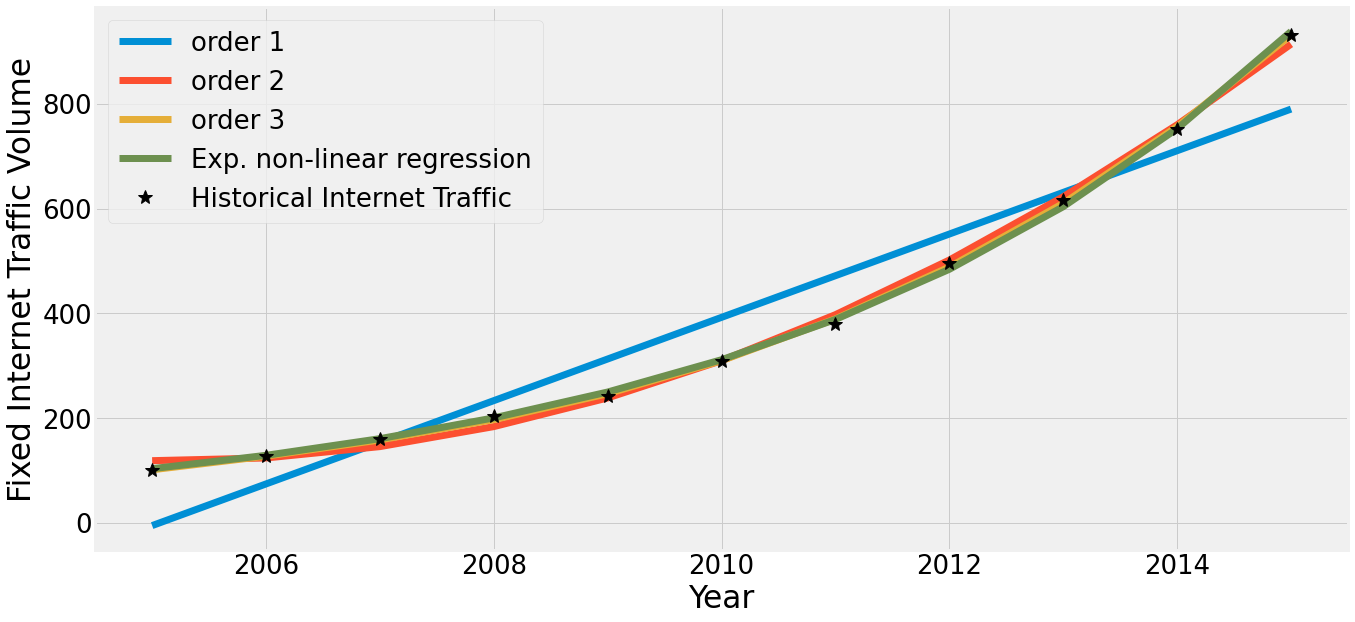

In [27]:
plt.figure(figsize = (20,10))

for model in models[0:-1]:
    
    x = df_hist.year.values      
    y = df_hist.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

x = np.arange(2016-2005)    
plt.plot(df_hist.year.values, my_exp_func(x, *models[-1]), label = 'Exp. non-linear regression', linewidth = 7)

plt.plot(df_hist.year, df_hist.traffic, '*k', markersize = 14, label='Historical Internet Traffic')
plt.legend(loc = 'upper left')

plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.show()

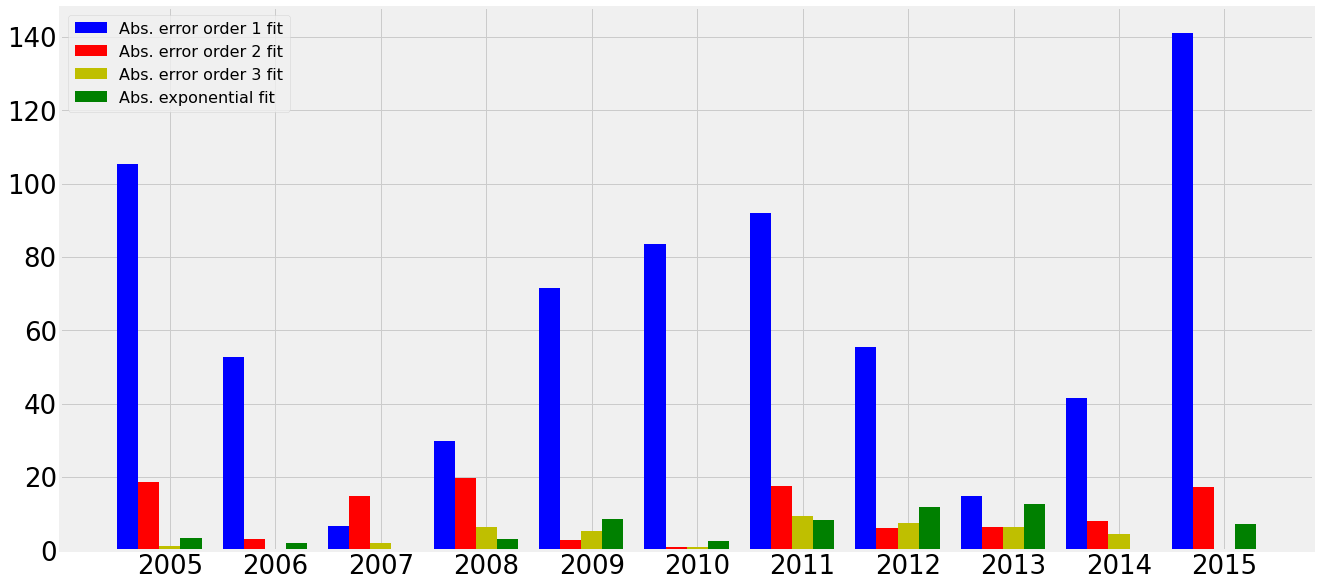

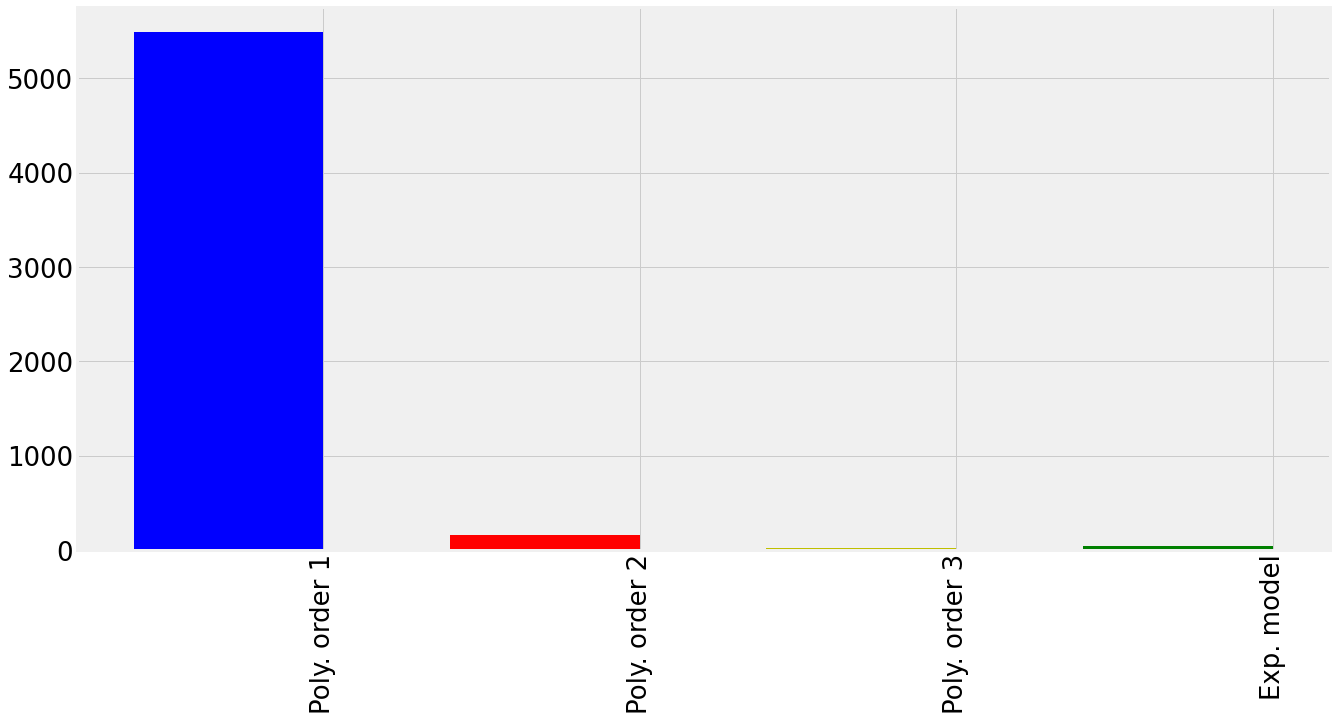

In [28]:
x = df_hist.year
width = 0.2   

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')
p4 = ax.bar( x + 3*width, errors_hist[3], width, color = 'g', label = 'Abs. exponential fit')

ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')
p4 = ax.bar( x[3], mse_hist[3], width, color = 'g', label = 'pred. exponential fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3', 'Exp. model' ], rotation=90)
plt.show()